<a href="https://colab.research.google.com/github/brunamycaela/Desafios-Plataforma-Dio/blob/main/Trabalhando_com_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhanddo com Planilhas do Excel

In [ ]:
# Importando a biblioteca pandas
import pandas as pd

In [ ]:
# Lendo os arquivos

df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [ ]:
# Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
# Exibindo as 5 primeiras linhas 
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# Exibir as ultimas 5 linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# verificar uma amostra do dataframe
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde
118,Natal,2019-01-02,92.21,1035,2
133,Fortaleza,2019-03-02,14.67,980,7
227,Salvador,2019-01-02,14.70,1035,1


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
# Verificando os tipos
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

# Tratanddo valores faltantes(null)

In [ ]:
# Consultando linhas com valores faltantes (null)
df.isnull().sum() # soma

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Substituir os valores nulos pela media
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [ ]:
# Subistituindo os valores nulo por zero
df['Vendas'].fillna(0, inplace=True)

In [ ]:
# Apagar as linhas com valores nulos com base em uma coluna
df.dropna(subset=['Vendas'],inplace=True)

In [ ]:
# Removendo linhas que estejam com valores nulos em todas as colunas
df.dropna(how='all', inplace=True)

# Criando colunas novas

In [ ]:
# Crianddo a coluna de receita
df['Receita'] = df['Vendas'].mul(df['Qtde']) # mul de multiplicação
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# Retornando a maior valor na receita
df['Receita'].max()

3544.0

In [ ]:
# Retornar a menor valor na receita 
df['Receita'].min()

3.34

In [ ]:
# Retornar top 3 com maior valor na receita Receita
df.nlargest(3, 'Receita') # Voce pode alterar a quantidade q aparece

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
# Retornanddo top 3 com o valores piores da receita
df.nsmallest(3,'Receita') # pode alterar a quantidade q vai aparecer

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
# Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenanddo o conjunto e dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


# Trabalhando com Datas

In [29]:
# Transformando a coluna data em tipo inteiro para teste e estudos
df['Data'] = df['Data'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [30]:
# verificando o tipo
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [31]:
# Passando a coluna para Datetime tipo data 
df['Data'] = pd.to_datetime(df['Data'])

In [33]:
# Agrupando por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [34]:
# Criando uma nova coluna somente com o ano
df['Ano_Venda'] = df['Data'].dt.year

In [35]:
# Pegar 5 amostra
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019
223,Natal,2019-01-02,40.51,1037,2,81.02,2019
92,Recife,2019-01-01,163.02,981,4,652.08,2019
202,Salvador,2019-01-02,22.45,1036,1,22.45,2019
65,Recife,2019-01-01,4.01,981,1,4.01,2019


In [38]:
# Criando duas nova coluna
df['Mes_Venda'], df['Dia_Venda'] =( df['Data'].dt.month, df['Data'].dt.day)

In [39]:
# Pegar 5 amostra
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
113,Aracaju,2018-01-01,23.05,1521,9,207.45,2018,1,1
156,Salvador,2019-01-02,36.14,1037,3,108.42,2019,1,2
189,Natal,2019-01-02,139.73,1037,2,279.46,2019,1,2
72,Salvador,2019-01-01,149.47,1036,3,448.41,2019,1,1
126,Aracaju,2018-01-01,13.41,1520,7,93.87,2018,1,1


In [40]:
# Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [41]:
# calculando a diferenças de dias 
df['Diferenca_dias'] = df['Data'] - df['Data'].min()

# Pegar 5 amostra
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias
90,Fortaleza,2019-01-01,18.01,1005,2,36.02,2019,1,1,365 days
72,Fortaleza,2019-01-01,106.72,1003,4,426.88,2019,1,1,365 days
201,Salvador,2019-01-02,86.61,1036,1,86.61,2019,1,2,366 days
8,Recife,2019-02-11,56.47,980,6,338.82,2019,2,11,406 days
46,Fortaleza,2019-01-01,6.45,1003,3,19.35,2019,1,1,365 days


In [43]:
# Criando a coluna de trimestre
df['Trimestre_ venda'] = df['Data'].dt.quarter

# Pegar 5 amostra
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_ venda
56,Natal,2018-03-02,704.00,852,4,2816.00,2018,3,2,60 days,1
104,Fortaleza,2019-01-01,40.50,1005,2,81.00,2019,1,1,365 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1
58,Salvador,2019-01-01,20.64,1037,2,41.28,2019,1,1,365 days,1
163,Natal,2019-01-02,17.66,1036,3,52.98,2019,1,2,366 days,1


In [46]:
# Filtrando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

# Pegar 5 amostra
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_ venda
124,Fortaleza,2019-03-02,47.98,983,7,335.86,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,2019,3,2,425 days,1
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1


# Visualização de Dados

In [47]:
# Conta quantas linhas tem pocada id
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

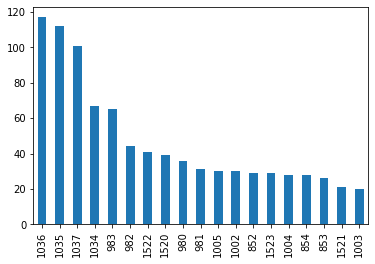

In [48]:
# Criando um grafico de barra que vai mostrar quantas linhas cada id tem 
df['LojaID'].value_counts(ascending=False).plot.bar()

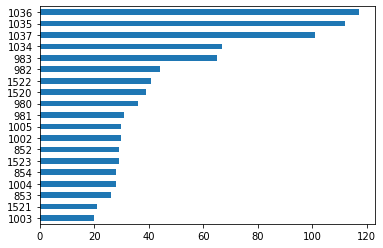

In [51]:
# Criando um grafico de barra que vai mostrar quantas linhas cada id tem 
df['LojaID'].value_counts(ascending=True).plot.barh(); # usar o barh para horizontal
# quando coloca o ; ele vai tirar a frase que fica de fora do grafico em cima.
# ex: <matplotlib.axes._subplots.AxesSubplot at 0x7f9d621edb50> 

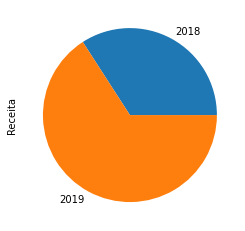

In [53]:
# criando um grafico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [54]:
# Total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

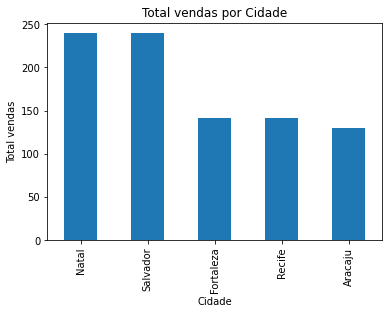

In [55]:
# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# Adicionamdo um titulo e alterando o nome dos eixos
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

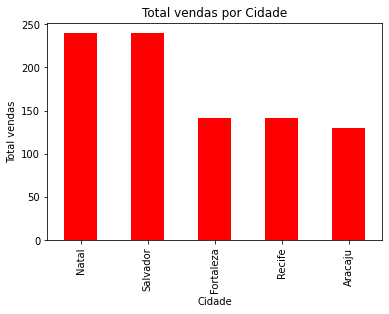

In [56]:
# Adicionamdo um titulo e alterando o nome dos eixos e alterando a cor para vermelho
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

In [60]:
# alterando o estilo
plt.style.use('ggplot')
# os estilo se encontra na documentação da biblioteca.

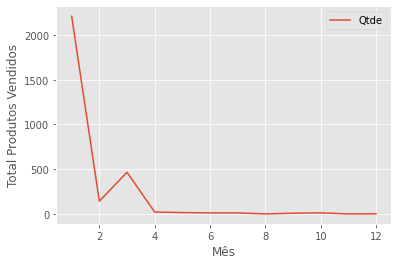

In [62]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot()
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [63]:
df.groupby(df['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [64]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda']== 2019]

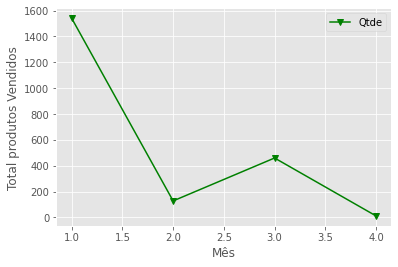

In [67]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'v', color='green')
plt.xlabel('Mês')
plt.ylabel('Total produtos Vendidos')
plt.legend();

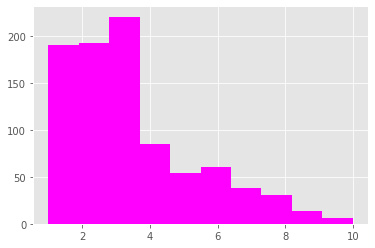

In [68]:
# Hisograma
plt.hist(df['Qtde'], color='magenta');

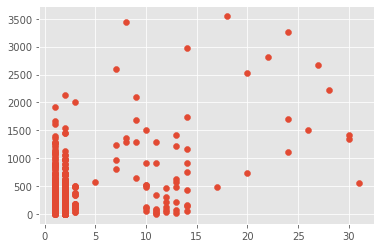

In [69]:
plt.scatter(x=df_2019['Dia_Venda'], y= df_2019['Receita']);

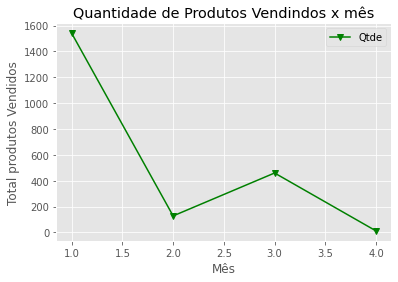

In [70]:
#  Salvando em PDF
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'v', color='green')
plt.title('Quantidade de Produtos Vendindos x mês')
plt.xlabel('Mês')
plt.ylabel('Total produtos Vendidos')
plt.legend()
plt.savefig('Grafico QTDE x Mes.png')